In [12]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


# Import API key
#from api_keys import geoapify_key

In [13]:
# Study data files
disaster_path = 'Data/group8_disaster.csv'


# Read the  data 
disaster_metadata = pd.read_csv(disaster_path)

#disaster_metadata=disaster_metadata.dropna()
# Combine the data into a single DataFrame
#Combined_data= pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
#Combined_data = Combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
#                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
disaster_metadata.head()
#Combined_data.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [14]:
disaster_metadata.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [15]:
disaster_metadata=disaster_metadata.drop(columns=['Glide','Seq','Disaster Subtype', 'Disaster Subsubtype','Event Name','Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'ISO', 'Start Day','End Day','CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'])

In [16]:
disaster_metadata.head()

,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location,Latitude,...,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,Mendoza,NaN,...,1970,1.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,Queensland,NaN,...,1970,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,Atacora region,NaN,...,1970,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,"Khulna, Chittagong",NaN,...,1970,11.0,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,NaN,NaN,...,1970,4.0,17.0,NaN,110.0,NaN,110.0,NaN,NaN,NaN


In [17]:
disaster_metadata_type=disaster_metadata['Disaster Type'].unique()
disaster_metadata_type

array(['Flood', 'Storm', 'Drought', 'Landslide', 'Earthquake', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Extreme temperature ',
       'Volcanic activity', 'Insect infestation', 'Impact',
       'Animal accident', 'Glacial lake outburst'], dtype=object)

In [18]:
#calculating the value count of disaster type
disaster_metadata['Disaster Type'].unique()
#calculating the sort the data in ascending oredr (pie chart for first three max.)

 

array(['Flood', 'Storm', 'Drought', 'Landslide', 'Earthquake', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Extreme temperature ',
       'Volcanic activity', 'Insect infestation', 'Impact',
       'Animal accident', 'Glacial lake outburst'], dtype=object)

In [19]:
# Identify the top three most frequent disasters
disaster_counts = disaster_metadata['Disaster Type'].value_counts()
disaster_counts

Disaster Type
Flood                    5272
Storm                    4005
Epidemic                 1436
Earthquake               1137
Landslide                 713
Drought                   685
Extreme temperature       584
Wildfire                  452
Volcanic activity         222
Insect infestation         93
Mass movement (dry)        41
Glacial lake outburst       2
Impact                      1
Animal accident             1
Name: count, dtype: int64

In [20]:
top_three_disasters = disaster_counts.head(3).index
print(f"Top Three Disasters: {top_three_disasters}")

Top Three Disasters: Index(['Flood', 'Storm', 'Epidemic'], dtype='object', name='Disaster Type')


In [21]:
# Filter disaster data for top three types
top_three_data = disaster_metadata[disaster_metadata['Disaster Type'].isin(top_three_disasters)]
top_three_data

,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location,Latitude,...,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,Mendoza,NaN,...,1970,1.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,Queensland,NaN,...,1970,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,Atacora region,NaN,...,1970,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,"Khulna, Chittagong",NaN,...,1970,11.0,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,NaN,NaN,...,1970,4.0,17.0,NaN,110.0,NaN,110.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14639,2021-0449-YEM,2021,Natural,Hydrological,Flood,Yemen,Western Asia,Asia,"Dhamar, Amran, Al Mahwit, Marib, Ibb, Sana’a C...",NaN,...,2021,8.0,11.0,NaN,67980.0,NaN,67980.0,NaN,NaN,NaN
14640,2021-0075-ZAF,2021,Natural,Hydrological,Flood,South Africa,Southern Africa,Africa,"Mpumalanga Province, Free State Province and t...",NaN,...,2021,2.0,31.0,NaN,400.0,NaN,400.0,NaN,NaN,75000.0
14641,2021-0599-COD,2021,Natural,Biological,Epidemic,Congo (the Democratic Republic of the),Middle Africa,Africa,Tshopo province,NaN,...,2021,9.0,131.0,301.0,NaN,NaN,301.0,NaN,NaN,NaN
14642,2021-0020-SRB,2021,Natural,Hydrological,Flood,Serbia,Southern Europe,Europe,"Zitoradja (Toplicki), Doljevac (Nisavski) , Di...",NaN,...,2021,1.0,NaN,NaN,22.0,NaN,22.0,NaN,NaN,NaN


In [22]:
# Ensure 'Total Damages' and 'Total Effective' are numeric
top_three_data["Total Damages ('000 US$)"] = pd.to_numeric(top_three_data["Total Damages ('000 US$)"], errors='coerce')
top_three_data['Total Affected'] = pd.to_numeric(top_three_data['Total Affected'], errors='coerce')


C:\Users\zarap\AppData\Local\Temp\ipykernel_35204\600179459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_data["Total Damages ('000 US$)"] = pd.to_numeric(top_three_data["Total Damages ('000 US$)"], errors='coerce')
C:\Users\zarap\AppData\Local\Temp\ipykernel_35204\600179459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_data['Total Affected'] = pd.to_numeric(top_three_data['Total Affected'], errors='coerce')


In [23]:
# Calculate total damages and effective per disaster type
destruction_summary = top_three_data.groupby('Disaster Type').agg({
    "Total Damages ('000 US$)": 'sum',
    'Total Affected': 'sum'
})
most_damaging_disasters = destruction_summary.idxmax()
print("Most Destructive Disasters:")
print(destruction_summary)

Most Destructive Disasters:
               Total Damages ('000 US$)  Total Affected
Disaster Type                                          
Epidemic                   0.000000e+00    2.904026e+07
Flood                      9.067633e+08    3.818297e+09
Storm                      1.640243e+09    1.192002e+09


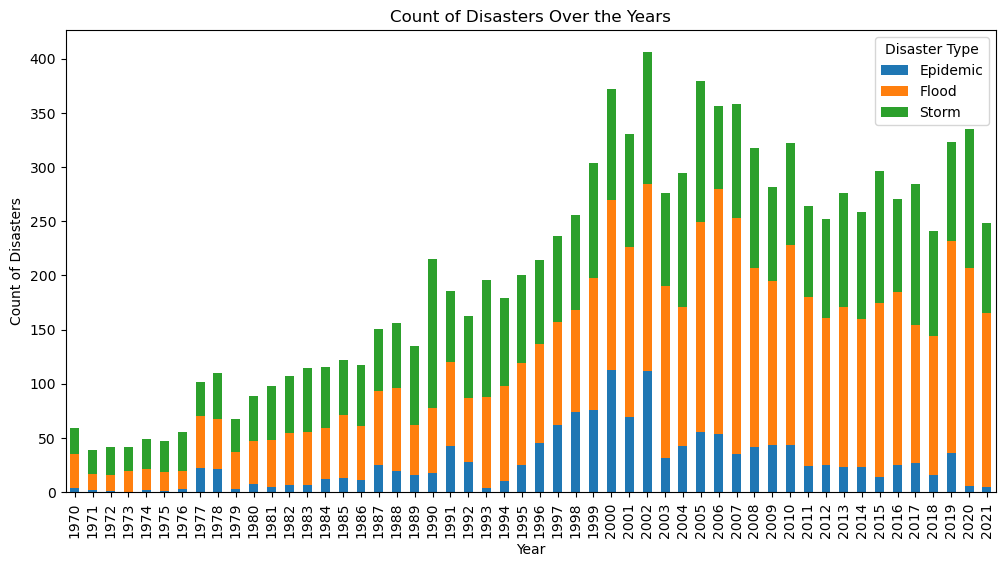

In [27]:
year_disaster_counts = top_three_data.groupby(['Year', 'Disaster Type']).size().unstack().fillna(0)

# List of custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # You can specify any colors you prefer

# Plot clustered bar chart with custom colors
ax = year_disaster_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Count of Disasters Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Disasters')
plt.legend(title='Disaster Type')
plt.show()

In [31]:
# Assuming `top_three_season_counts` and `top_three_disasters` are defined as in your original code

# Define month names for labeling
month_names = pd.to_datetime([f'2024-{i:02d}-01' for i in range(1, 13)]).strftime('%B')
month_names

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

C:\Users\zarap\AppData\Local\Temp\ipykernel_35204\799368053.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_names = pd.date_range(start='2024-01-01', periods=12, freq='M').strftime('%B')


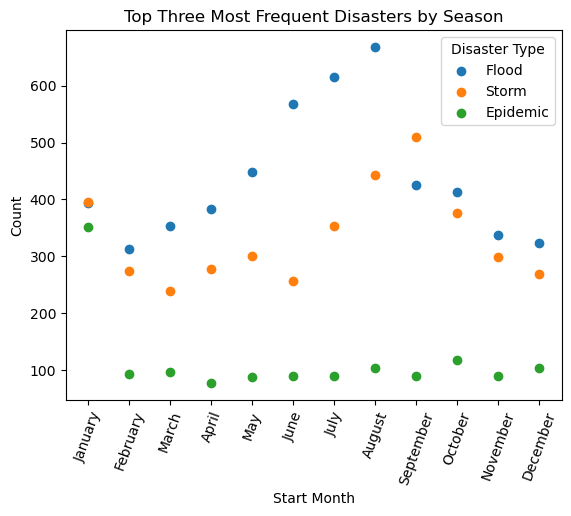

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `top_three_season_counts` and `top_three_disasters` are defined as in your original code

# Define month names for labeling
month_names = pd.date_range(start='2024-01-01', periods=12, freq='M').strftime('%B')

# Create a dictionary mapping month numbers to month names
month_mapping = {i+1: name for i, name in enumerate(month_names)}

# Scatter Plot
for disaster in top_three_disasters:
    plt.scatter(top_three_season_counts.index, top_three_season_counts[disaster], label=disaster)

plt.title('Top Three Most Frequent Disasters by Season')
plt.xlabel('Start Month')
plt.ylabel('Count')

# Set month names as x-ticks with vertical rotation
plt.xticks(ticks=top_three_season_counts.index, labels=[month_mapping.get(i, '') for i in top_three_season_counts.index], rotation=70)

plt.legend(title='Disaster Type')
plt.show()


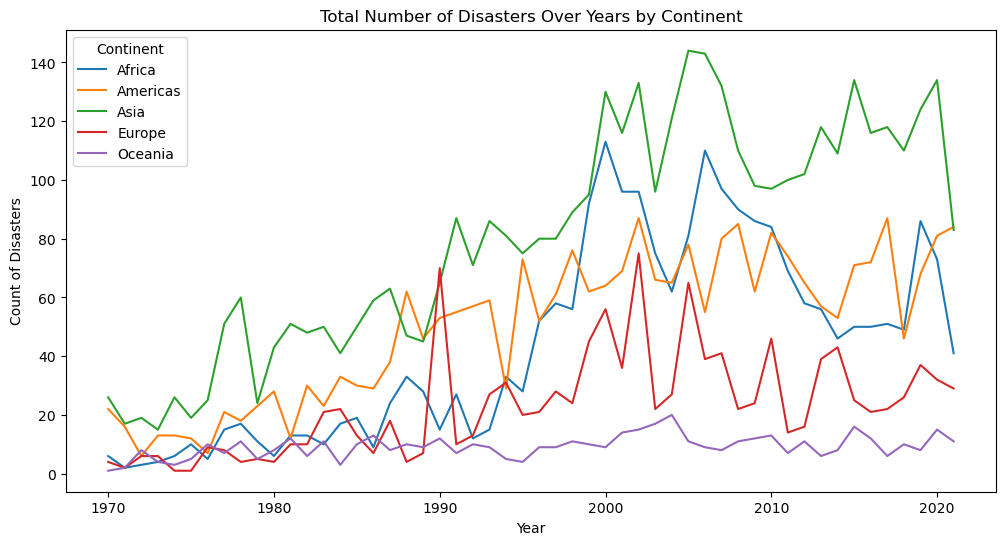

In [35]:
# Line Chart for Total Number of Disasters Over Years by Continent
top_three_years_continents = top_three_data.groupby(['Year', 'Continent']).size().unstack()
top_three_years_continents.plot(kind='line', figsize=(12, 6))
plt.title('Total Number of Disasters Over Years by Continent')
plt.xlabel('Year')
plt.ylabel('Count of Disasters')
plt.legend(title='Continent')
plt.show()

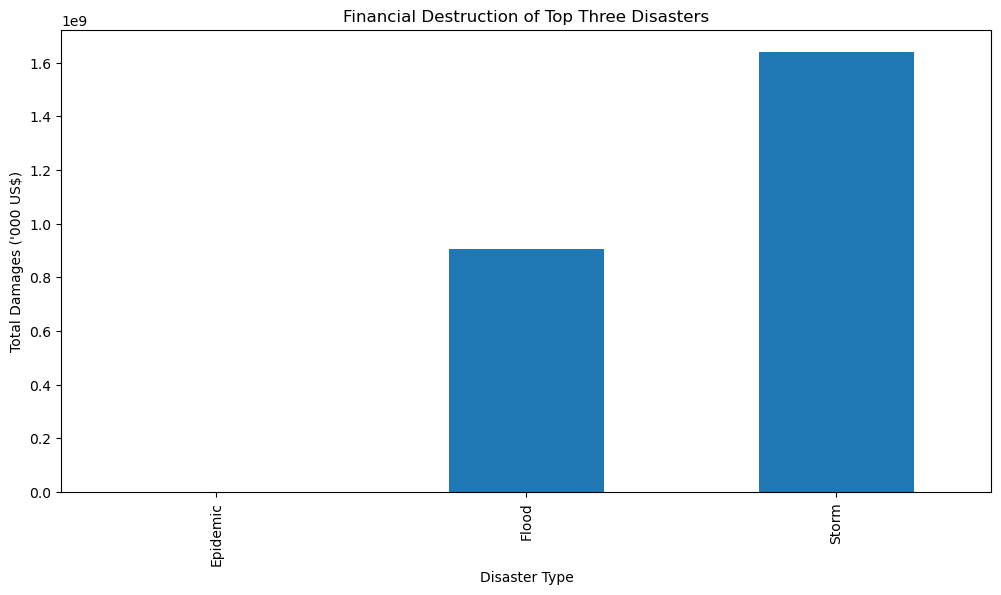

In [37]:
# Most Financially Destructive Disaster Type (Bar Chart)
financial_destruction_top_three = top_three_data.groupby('Disaster Type')["Total Damages ('000 US$)"].sum()
financial_destruction_top_three.plot(kind='bar', figsize=(12, 6))
plt.title('Financial Destruction of Top Three Disasters')
plt.xlabel('Disaster Type')
plt.ylabel("Total Damages ('000 US$)")
plt.show()
